In [5]:
import pandas as pd

In [2]:
import sqlite3

##### Get tables from Database

In [7]:
conn = sqlite3.connect('factbook.db')
q = '''
SELECT * 
FROM sqlite_master 
WHERE type='table';
'''
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


##### Return first five rows of `facts` table

In [20]:
q = '''
SELECT *
FROM facts
LIMIT 5;
'''
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [12]:
q = '''
SELECT MIN(population) 'Minimum Population'
FROM facts
'''
pd.read_sql_query(q, conn)

,Minimum Population
0,0


In [13]:
q = '''
SELECT MAX(population) 'Maximum Population'
FROM facts
'''
pd.read_sql_query(q, conn)

,Maximum Population
0,7256490011


In [14]:
q = '''
SELECT MIN(population_growth) 'Minimum Population Growth'
FROM facts
'''
pd.read_sql_query(q, conn)

,Minimum Population Growth
0,0.0


In [15]:
q = '''
SELECT MAX(population_growth) 'Maximum Population Growth'
FROM facts
'''
pd.read_sql_query(q, conn)

,Maximum Population Growth
0,4.02


In [17]:
q = '''
SELECT name, population
FROM facts
WHERE population IN (
SELECT MAX(population)
FROM facts
);
'''
pd.read_sql_query(q, conn)

,name,population
0,World,7256490011


In [18]:
q = '''
SELECT name, population
FROM facts
WHERE population IN (
SELECT MIN(population)
FROM facts
);
'''
pd.read_sql_query(q, conn)

,name,population
0,Antarctica,0


##### Max and Min Population Observations

The maximum population is returning the total population of the world, which should also be the total of the population column. This is most likely not what I was looking for when trying to find the highest population.

The minimum population makes sense as well. However, like the max population, Antarctica is probably something I can exclude when looking for the lowest population.

In [21]:
q = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population NOT IN (
SELECT MIN(population)
FROM facts
) AND (
SELECT MAX(population)
FROM facts
);
'''

hist_data = pd.read_sql_query(q, conn)

In [23]:
import matplotlib.pyplot as plt
%matplotlib

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdbcf32cc88>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7fdbcf205470>]], dtype=object)

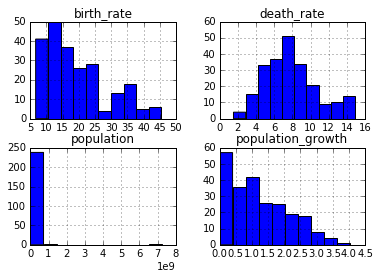

In [24]:
hist_data.hist()

Which countries have the highest population density?
Population density is the ratio of population to land area. Compare your results with those from Wikipedia.
Generate a histogram of population densities.
Which countries have the highest ratios of water to land? Which countries have more water than land?